In [ ]:
import pandas as pd
import numpy as np
import os
import pickle
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
%matplotlib inline

drive.mount("/content/drive")
os.chdir("drive/MyDrive/Colab Notebooks/ML Project")
print("Current Working Directory:", os.getcwd())

Mounted at /content/drive
Current Working Directory: /content/drive/MyDrive/Colab Notebooks/ML Project


In [ ]:
normal_df = None
with open('Balance_normal_train_rgb_df_32.pkl', 'rb') as f:
  normal_df = pickle.load(f)

pneumonia_df = None
with open('Pneumonia_train_rgb_df_32.pkl', 'rb') as f:
  pneumonia_df = pickle.load(f)

test_df = None
with open('Test_rgb_df_32.pkl', 'rb') as f:
  test_df = pickle.load(f)

In [ ]:
train_df = pd.concat([normal_df, pneumonia_df])
scaler = StandardScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df))
train_df["Label"] = pd.Series(np.concatenate((np.zeros(len(normal_df)), np.ones(len(pneumonia_df)))))

test_df = pd.DataFrame(scaler.transform(test_df))
test_df["Label"] = pd.Series(np.concatenate((np.zeros(234), np.ones(390))))

In [ ]:
X, y= train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]
clf = LogisticRegression(max_iter = 100, C = 0.05)
clf.fit(X, y)
y_pred_train = clf.predict(X)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
train_accuracy = accuracy_score(y, y_pred_train)

In [ ]:
print('Logistic Regression Classifier Model Classification Report', '\n', classification_report(y_test, y_pred, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)']))

Logistic Regression Classifier Model Classification Report 
                      precision    recall  f1-score   support

   NORMAL (Class 0)       0.96      0.38      0.54       234
PNEUMONIA (Class 1)       0.73      0.99      0.84       390

           accuracy                           0.76       624
          macro avg       0.84      0.69      0.69       624
       weighted avg       0.81      0.76      0.73       624



In [ ]:
mat = confusion_matrix(y_test, y_pred)
TN = mat[0][0]
TP = mat[1][1]
FN = mat[1][0]
FP = mat[0][1]
acc = (TN+TP)/(TN+TP+FN+FP)
recall = (TP)/(TP+FN)
specificity = (TN)/(TN+FP)
auc = roc_auc_score(y_test, y_pred)

print("Recall of test set:", recall)
print("Specificity of test set:", specificity)
print("Accuracy on test set:", acc)
print("AUC score of test set:", auc)
print("Accuracy of train set:", train_accuracy)

Recall of test set: 0.9897435897435898
Specificity of test set: 0.3803418803418803
Accuracy on test set: 0.7612179487179487
AUC score of test set: 0.685042735042735
Accuracy of train set: 0.9931662870159453


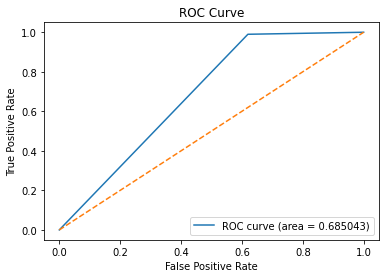

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label = 'ROC curve (area = %f)' % auc)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
!pip install --upgrade plotly==4.14.0
import plotly.express as plt2

def plot_cm(z, label_names):
    fig = plt2.imshow(z,
                     labels = dict(x = "Predicted", y = "Actual", color = "Productivity"),
                     x = label_names,
                     y = label_names,
                     width = 700)
    fig.update_layout(title = 'Confusion Matrix')
    fig.update_xaxes(side = "top")
    return fig

     |████████████████████████████████| 13.2MB 290kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
plot_cm(mat, ['NORMAL (Class 0)','PNEUMONIA (Class 1)']).show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


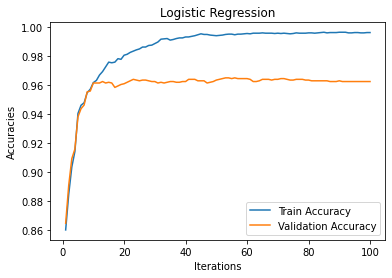

In [ ]:
val_acc = []
train_acc = []
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.7, random_state = 11)
for i in range(1, 101):
  clf = LogisticRegression(max_iter = i, C = 0.05)
  clf.fit(X_train, y_train)
  y_pred_train = clf.predict(X_train)
  y_pred = clf.predict(X_val)
  val_acc.append(accuracy_score(y_val, y_pred))
  train_acc.append(accuracy_score(y_train, y_pred_train))
iters = [i for i in range(1, 101)]
plt.plot(iters, train_acc, label = "Train Accuracy")
plt.plot(iters, val_acc, label = "Validation Accuracy")
plt.legend()
plt.title("Logistic Regression")
plt.xlabel("Iterations")
plt.ylabel("Accuracies")
plt.show()